In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import constants
from scipy import stats
from copy import deepcopy
from numpy.lib import scimath
import os
from scipy.special import ellipk

In [37]:
archivo ="C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/results_toroidal_cartesian/torpath0029.txt" # Toropath0085
carpeta = "C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/results_toroidal_cartesian/"
angulo = 90

In [38]:
def CargarDatos(carpeta,angulo):
    list_archiv = os.listdir(carpeta)
    list_archiv.sort()
    
    angulo_rad = angulo*np.pi/180
    dphi = 0.01
    phi_up = angulo_rad + dphi/2
    phi_down = angulo_rad - dphi/2
    R0 = 0.2477 #Radio característico del SCR-1
    Coord = []
    for Archi in list_archiv:

        data = np.loadtxt(carpeta + Archi, dtype=float, skiprows=2, delimiter='\t')
        #Cilindrical Toroidal Transform
        iRange, _ = data.shape
        
        for i in range(iRange):
            rtor = data[i,0]
            phi = data[i,1]
            thetator = data[i,2]
            if phi_down<=phi<=phi_up:
                R = R0+rtor*np.cos(thetator)
                z = rtor*np.sin(thetator)
                B = data[i,3]
                Br = data[i,4]*np.cos(phi) + data[i,5]*np.sin(phi)
                Bphi = data[i,4]*np.sin(phi)-data[i,5]*np.cos(phi)
                Bz = data[i,6]
                Coord.append([R,z,thetator,B,Br,Bphi,Bz])
        
        print("Feedback: ",Archi)
    Coord.sort(key=lambda x:x[0])
    datos = np.array(Coord)
        
    return datos

In [39]:
poincare = CargarDatos(carpeta,angulo)

Feedback:  torpath0029.txt
Feedback:  torpath0030.txt
Feedback:  torpath0033.txt
Feedback:  torpath0035.txt
Feedback:  torpath0036.txt
Feedback:  torpath0037.txt
Feedback:  torpath0044.txt
Feedback:  torpath0045.txt
Feedback:  torpath0047.txt
Feedback:  torpath0048.txt
Feedback:  torpath0049.txt
Feedback:  torpath0051.txt
Feedback:  torpath0054.txt
Feedback:  torpath0064.txt
Feedback:  torpath0068.txt
Feedback:  torpath0070.txt
Feedback:  torpath0072.txt
Feedback:  torpath0073.txt
Feedback:  torpath0074.txt


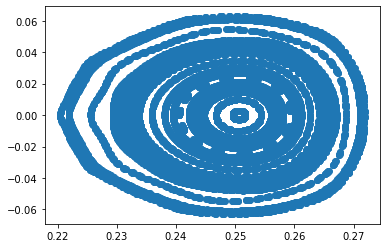

In [40]:
plt.scatter(poincare[:,0],poincare[:,1])
plt.show()

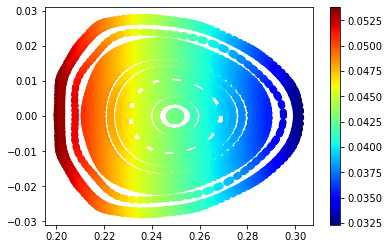

In [6]:
plt.scatter(poincare[:,0],poincare[:,1],c=poincare[:,3],cmap='jet')
plt.colorbar()

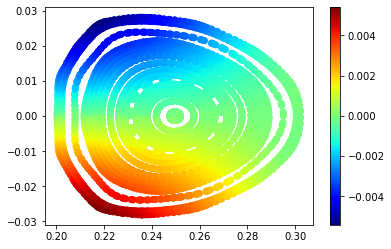

In [7]:
plt.scatter(poincare[:,0],poincare[:,1],c=poincare[:,4],cmap='jet')
plt.colorbar()

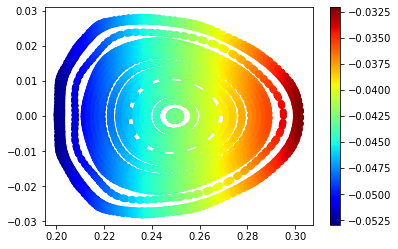

In [8]:
plt.scatter(poincare[:,0],poincare[:,1],c=poincare[:,5],cmap='jet')
plt.colorbar()

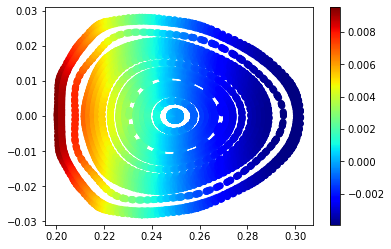

In [9]:
plt.scatter(poincare[:,0],poincare[:,1],c=poincare[:,6],cmap='jet')
plt.colorbar()

# Parametrización del campo en el corte seleccionado

Se desea escribir cada una de las componentes del campo magnético en el corte como función de su posición, para esto se escoge un modelo polinomial de grado dos de la forma:

$$B_{q}(R,z) = AR^{2}+Bz^{2}+CRz+DR+Ez+F$$

Se selecciona el método de mínimos cuadrados para aproximar el modelo anterior, de forma que queda de la forma:

$$I = \sum_{i=1}^{n}\left(B_{q,i}-\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)\right)^{2}$$

Se propone la solución del sistema como:

$$\frac{\partial I}{\partial A}=\frac{\partial I}{\partial B}=\frac{\partial I}{\partial C}=\frac{\partial I}{\partial D}=\frac{\partial I}{\partial E}=\frac{\partial I}{\partial F}=0$$

Lo que lleva al sistema de ecuaciones

$$
\left\{
    \begin{array}[ll]
        .\sum_{i=1}^{n}R_{i}^{2}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}R_{i}^{2}B_{q,i}\\
        \sum_{i=1}^{n}z_{i}^{2}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}z_{i}^{2}B_{q,i}\\
        \sum_{i=1}^{n}R_{i}z_{i}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}R_{i}z_{i}B_{q,i}\\
        \sum_{i=1}^{n}R_{i}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}R_{i}B_{q,i}\\
        \sum_{i=1}^{n}z_{i}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}z_{i}B_{q,i}\\
        \sum_{i=1}^{n}\left(AR_{i}^{2}+Bz_{i}^{2}+CR_{i}z_{i}+DR_{i}+Ez_{i}+F\right)&=\sum_{i=1}^{n}B_{q,i}\\
    \end{array}
\right.
$$

In [10]:
def SistemaEcuaciones(poincare,q):
    R=poincare[:,0]
    z=poincare[:,1]
    Bq=poincare[:,q]
    eq1=np.array([(R**4).sum(),(R**2*z**2).sum(),(R**3*z).sum(),(R**3).sum(),(R**2*z).sum(),(R**2).sum()]).reshape(1,6)
    eq2=np.array([(R**2*z**2).sum(),(z**4).sum(),(R*z**3).sum(),(R*z**2).sum(),(z**3).sum(),(z**2).sum()]).reshape(1,6)
    eq3=np.array([(R**3*z).sum(),(R*z**3).sum(),(R**2*z**2).sum(),(R**2*z).sum(),(R*z**2).sum(),(R*z).sum()]).reshape(1,6)
    eq4=np.array([(R**3).sum(),(R*z**2).sum(),(R**2*z).sum(),(R**2).sum(),(R*z).sum(),(R).sum()]).reshape(1,6)
    eq5=np.array([2*(R**2*z).sum(),2*(z**3).sum(),2*(R*z**2).sum(),2*(R*z).sum(),2*(z**2).sum(),2*(z).sum()]).reshape(1,6)
    eq6=np.array([(R**2).sum(),(z**2).sum(),(R*z).sum(),R.sum(),z.sum(),1]).reshape(1,6)
    matrix=np.zeros((6,6))
    matrix[0,:]=eq1
    matrix[1,:]=eq2
    matrix[2,:]=eq3
    matrix[3,:]=eq4
    matrix[4,:]=eq5
    matrix[5,:]=eq6
    b=np.array([(R**2*Bq).sum(),(z**2*Bq).sum(),(R*z*Bq).sum(),(R*Bq).sum(),(z*Bq).sum(),Bq.sum()]).reshape(6,1)
    return np.matrix(matrix),np.matrix(b)

In [11]:
Aphi,bphi=SistemaEcuaciones(poincare,5)

In [12]:
def SoluciónSistema(A,b):
    Coeficientes=np.matmul(np.linalg.inv(A),b)
    return Coeficientes

In [13]:
Xphi = SoluciónSistema(Aphi,bphi)

In [14]:
def GráficaSuperficie(X,R,z,BS):
    Bq=R**2*X[0,0]+z**2*X[1,0]+R*z*X[2,0]+R*X[3,0]+z*X[4,0]+X[5,0]
    plt.scatter(R,z,c=Bq,cmap='jet')
    plt.title('Parametrización')
    plt.colorbar()
    plt.show()
    plt.scatter(R,z,c=BS,cmap='jet')
    plt.title('Datos Generados por BS-Solctra')
    plt.colorbar()
    plt.show()

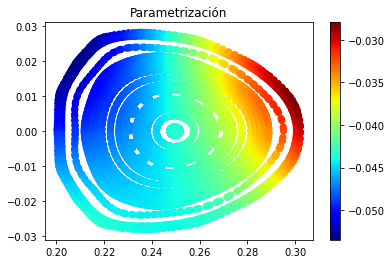

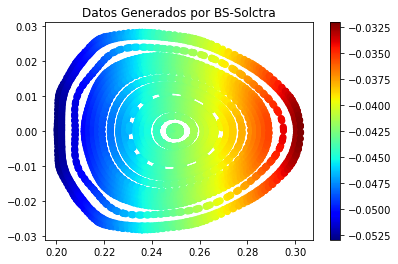

In [15]:
GráficaSuperficie(Xphi,poincare[:,0],poincare[:,1],poincare[:,5])

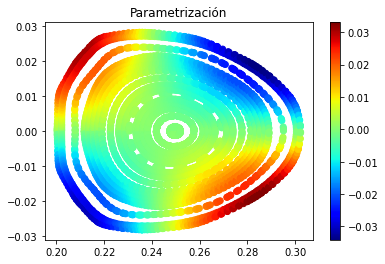

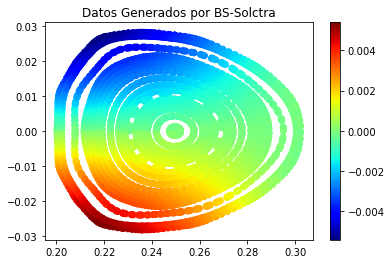

In [16]:
Ar,br=SistemaEcuaciones(poincare,4)
Xr = SoluciónSistema(Ar,br)
GráficaSuperficie(Xr,poincare[:,0],poincare[:,1],poincare[:,4])

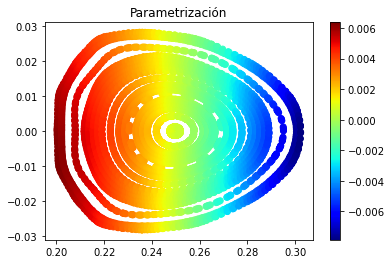

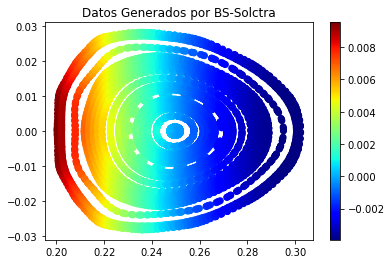

In [17]:
Az,bz=SistemaEcuaciones(poincare,6)
Xz = SoluciónSistema(Az,bz)
GráficaSuperficie(Xz,poincare[:,0],poincare[:,1],poincare[:,6])

## Ampliando el modelo

De los resultados anteriores, se observó que si bien la aproximación fue parcialmente buena para dos de las superficies magnéticas, de esta forma, se decide ampliar el modelo con términos cúbicos e interacciones triples, de la forma:

$$B_{q}(R,z) = AR^{4}+Bz^{4}+CR^{3}z+DR^{2}z^{2}+ERz^{3}+FR^{3}+Gz^{3}+HR^{2}z+IRz^{2}+JR^{2}+Kz^{2}+LRz+MR+Nz+O$$

Para encontrar los coeficientes que definen la función anterior, se debe realizar la solución para un sistema como el anterior; sin embargo, ya que es más laborioso, se opta por utilizar una de las librerías de Python que permiten realizar este procedimiento, a continuación se muestra los resultados.

In [18]:
def B_q(X,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O):
    '''
    Función que calcula el valor de una respuesta a partir de un modelo lineal genera con interacciones de orden 3.
    
    Parámetros de entrada:
    ----------------------
    X: Una tupla que contiene dos arreglos que con los valores de las variables independientes.
    A,B,C,D,E,F,G,H,I,J: Son los coeficientes de peso de la interacción.
    
    Salida:
    ----------------------
    Un arreglo con los valores de la función para los dos arreglos brindados en X.
    '''
    return A*X[0]**4+B*X[1]**4+C*X[0]**3*X[1]+D*X[0]**2*X[1]**2+E*X[0]*X[1]**3+F*X[0]**3+G*X[1]**3+H*X[0]**2*X[1]+I*X[0]*X[1]**2+J*X[0]**2+K*X[1]**2+L*X[0]*X[1]+M*X[0]+N*X[1]+O

In [19]:
X=(poincare[:,0],poincare[:,1])

In [20]:
# Se realiza la minimización de la función con curve_fit
CoefsR,CovR=scipy.optimize.curve_fit(B_q,X,poincare[:,4])

In [21]:
def GráficaParametrización(Coefs,X,BS):
    '''
    Función que compara los valores obtenidos de la parametrización del modelo con curve_fit y los valores originales
    
    Parámetros de entrada:
    ----------------------
    Coefs: Arreglo con los coeficientes obtenidos de curve_fit.
    X: la tupla con los dos arreglos de las variables independientes.
    BS: El valor original que se quiere aproximar con el modelo.
    
    Salida:
    ----------------------
    Las gráficas para la comparación.
    La desviación estándar del modelo.
    '''
    A=Coefs[0]
    B=Coefs[1]
    C=Coefs[2]
    D=Coefs[3]
    E=Coefs[4]
    F=Coefs[5]
    G=Coefs[6]
    H=Coefs[7]
    I=Coefs[8]
    J=Coefs[9]
    K=Coefs[10]
    L=Coefs[11]
    M=Coefs[12]
    N=Coefs[13]
    O=Coefs[14]
    Bq=A*X[0]**4+B*X[1]**4+C*X[0]**3*X[1]+D*X[0]**2*X[1]**2+E*X[0]*X[1]**3+F*X[0]**3+G*X[1]**3+H*X[0]**2*X[1]+I*X[0]*X[1]**2+J*X[0]**2+K*X[1]**2+L*X[0]*X[1]+M*X[0]+N*X[1]+O
    plt.scatter(X[0],X[1],c=Bq,cmap='jet')
    plt.title('Parametrización')
    plt.colorbar()
    plt.show()
    plt.scatter(X[0],X[1],c=BS,cmap='jet')
    plt.title('Datos generados de BS-Solctra')
    plt.colorbar()
    plt.show()
    return np.sqrt(((BS-Bq)**2).sum()/(len(Bq)-2))

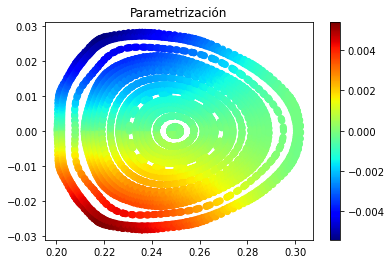

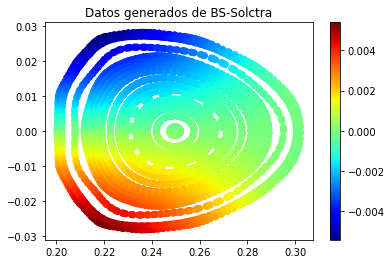

1.5536355731993394e-05

In [22]:
GráficaParametrización(CoefsR,X,poincare[:,4])

In [23]:
CoefsPhi,CovPhi=scipy.optimize.curve_fit(B_q,X,poincare[:,5])

In [25]:
Coefsz,Covz=scipy.optimize.curve_fit(B_q,X,poincare[:,6])

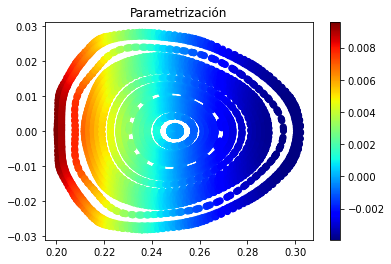

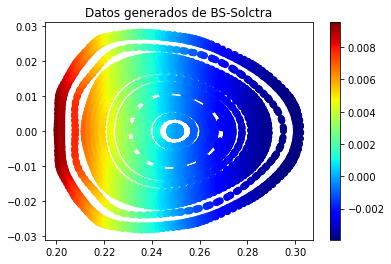

5.0497091328595705e-06

In [26]:
GráficaParametrización(Coefsz,X,poincare[:,6])

In [27]:
def ComponentesCampo(X,Coefs):
    A=Coefs[0]
    B=Coefs[1]
    C=Coefs[2]
    D=Coefs[3]
    E=Coefs[4]
    F=Coefs[5]
    G=Coefs[6]
    H=Coefs[7]
    I=Coefs[8]
    J=Coefs[9]
    K=Coefs[10]
    L=Coefs[11]
    M=Coefs[12]
    N=Coefs[13]
    O=Coefs[14]
    Bq=A*X[0]**4+B*X[1]**4+C*X[0]**3*X[1]+D*X[0]**2*X[1]**2+E*X[0]*X[1]**3+F*X[0]**3+G*X[1]**3+H*X[0]**2*X[1]+I*X[0]*X[1]**2+J*X[0]**2+K*X[1]**2+L*X[0]*X[1]+M*X[0]+N*X[1]+O
    plt.scatter(X[0],X[1],c=Bq,cmap='jet')
    plt.xlabel('R [m]')
    plt.ylabel('z [m]')
    plt.colorbar()
    plt.show()
    return Bq

In [28]:
z_prueba=np.arange(-0.03,0.03+0.0006,0.0006)
R_prueba=np.arange(0.2,0.305+0.001,0.001)
Rx,zy=np.meshgrid(R_prueba,z_prueba)

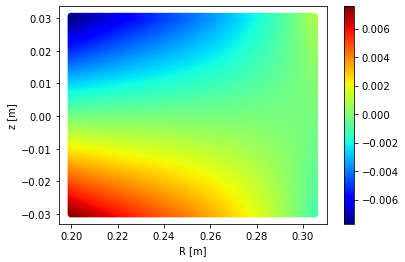

In [29]:
Br=ComponentesCampo((Rx,zy),CoefsR)

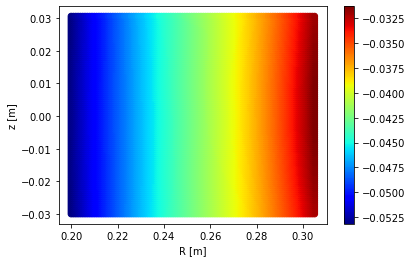

In [30]:
Bphi=ComponentesCampo((Rx,zy),CoefsPhi)

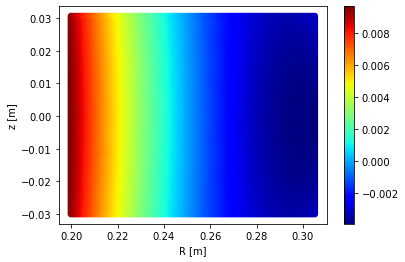

In [31]:
Bz=ComponentesCampo((Rx,zy),Coefsz)

## Integración de Monte Carlo para calcular el flujo magnético

In [32]:
def IntegralMonteCarlo(Bq,N,nv):
    R=[]
    z=[]
    for inv in range(nv):
        iR=[]
        iz=[]
        for iN in range(N):
            np.random.seed(np.random.randint(10**4,10**8))
            iR.append((np.max(Rx)-np.min(Rx))*np.random.random()+np.min(Rx))
            iz.append((np.max(zy)-np.min(zy))*np.random.random()+np.min(zy))
        R.append(np.array(iR))
        z.append(np.array(iz))
    Flujo=ComponentesCampo((np.array(R),np.array(z)),CoefsPhi).sum()*(np.max(Rx)-np.min(Rx))*(np.max(zy)-np.min(zy))/N
    return (Flujo,1/np.sqrt(N))

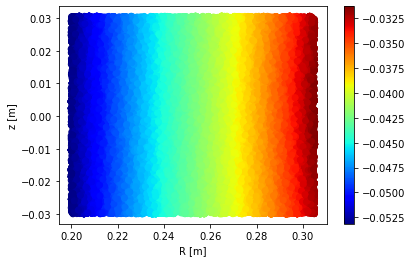

(-0.026946809007376955, 0.03162277660168379)

In [33]:
IntegralMonteCarlo(ComponentesCampo,1000,100)

In [34]:
torpath29=np.loadtxt(archivo,skiprows=1)

In [35]:
phi_up=0.01/2
phi_down=-phi_up
Rz29=[]
for i in range(len(torpath29)):
    rtor=torpath29[i,0]
    phi=torpath29[i,1]
    thetator=torpath29[i,2]
    if phi_down<=phi<=phi_up:
        R=0.2477+rtor*np.cos(thetator)
        z=rtor*np.sin(thetator)
        Rz29.append([R,z])
Rz29.sort(key = lambda x:x[0])
Rz29=np.array(Rz29)

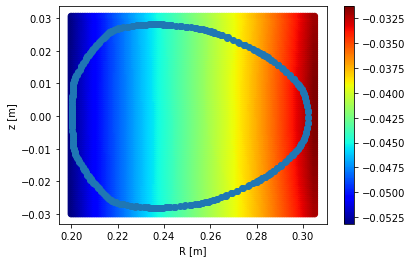

In [41]:
plt.scatter(Rx,zy,c=Bphi,cmap='jet')
plt.xlabel('R [m]')
plt.ylabel('z [m]')
plt.colorbar()
plt.scatter(Rz29[:,0],Rz29[:,1])
plt.show()